In [1]:
from env2048.vectenv import Vectorized2048Env
from env2048.vectmcts import Vectorized2048MCTSLazy
from az_resnet import AZResnet, AZResnetArchitectureParameters
import torch
import matplotlib.pyplot as plt
import logging
logging.basicConfig(filename='training.log', filemode='a', level=logging.INFO, format='%(asctime)s %(message)s')
logging.info('Starting training')

/Users/marshingjay/miniconda3/envs/python3/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

from env2048.vecttrainer import VectorizedTrainer
from hyperparameters import AZ_HYPERPARAMETERS, LazyAZHyperparameters

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
num_boards = 10
v = Vectorized2048Env(num_boards, device)
model = AZResnet(AZResnetArchitectureParameters(
    input_size=torch.Size((1, 4, 4)),
    policy_size=4,
    res_channels=8,
    res_blocks=2, 
    value_head_res_channels=8,
    value_head_res_blocks=2,
    policy_head_res_channels=8,
    policy_head_res_blocks=2,
    kernel_size=3,
    policy_fc_size=32,
    value_fc_size=32
))
mc = Vectorized2048MCTSLazy(v, model, 1)
v.reset()

hyperparameters = LazyAZHyperparameters()

trainer = VectorizedTrainer(mc, model, hyperparameters, device)
plt.close('all')

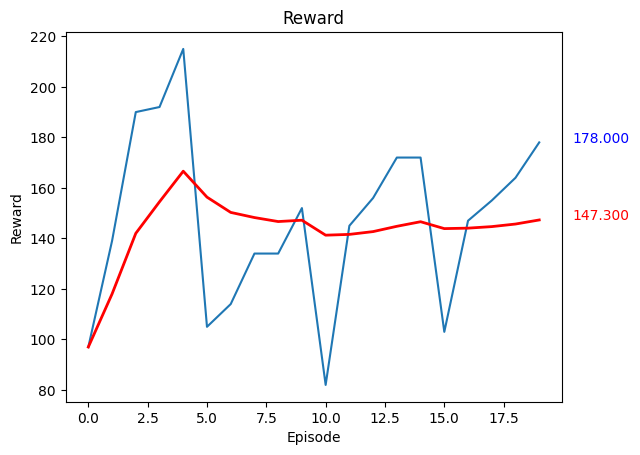

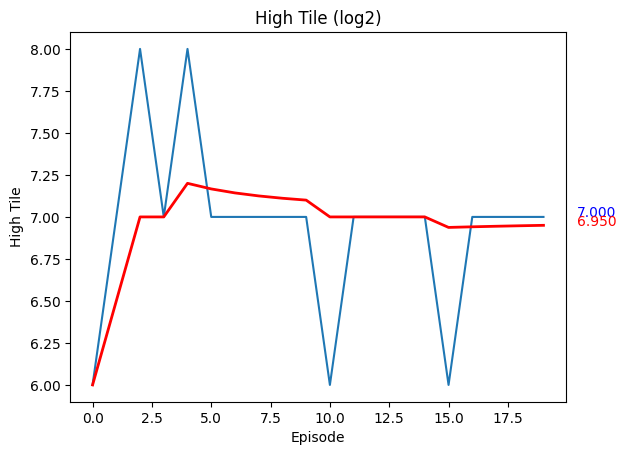

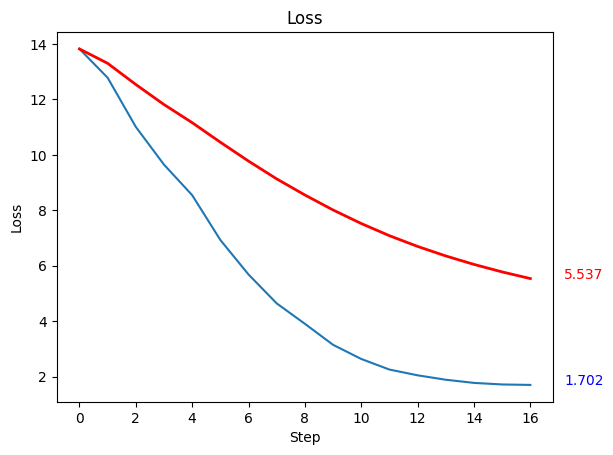

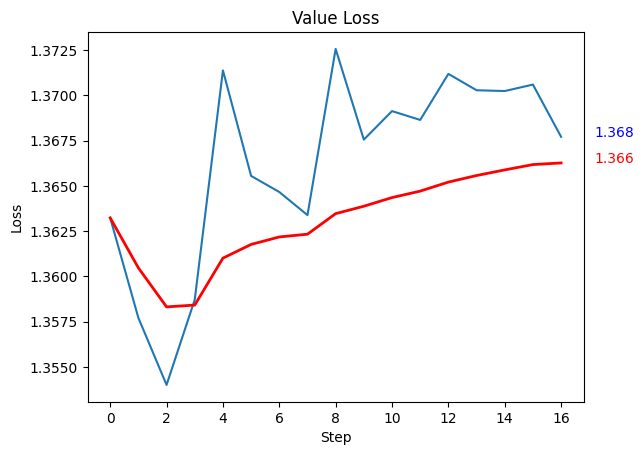

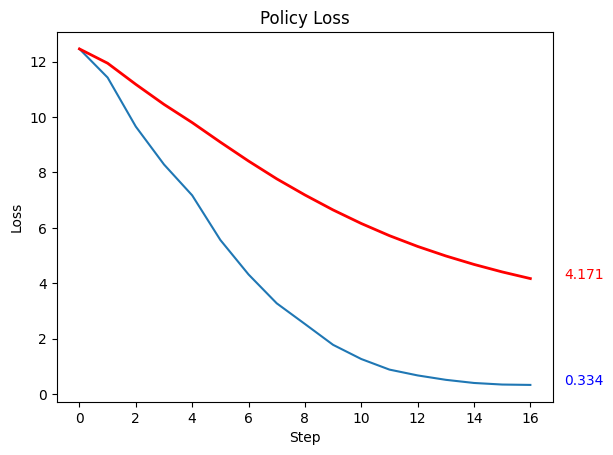

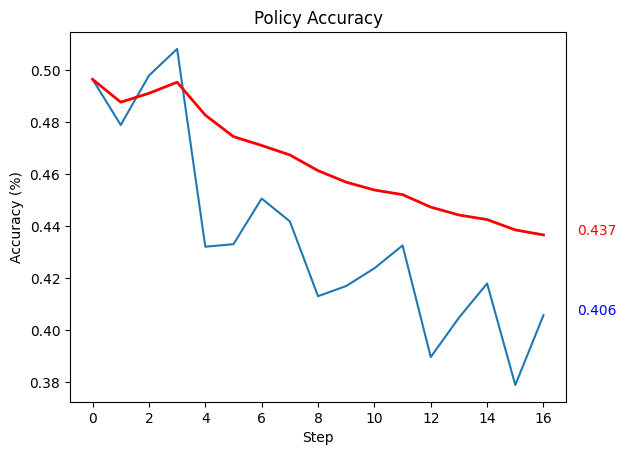

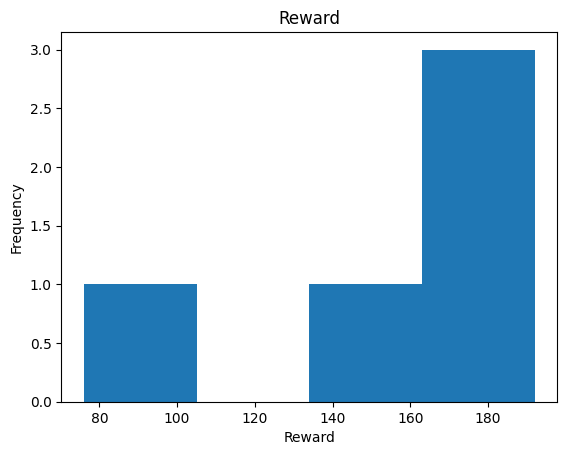

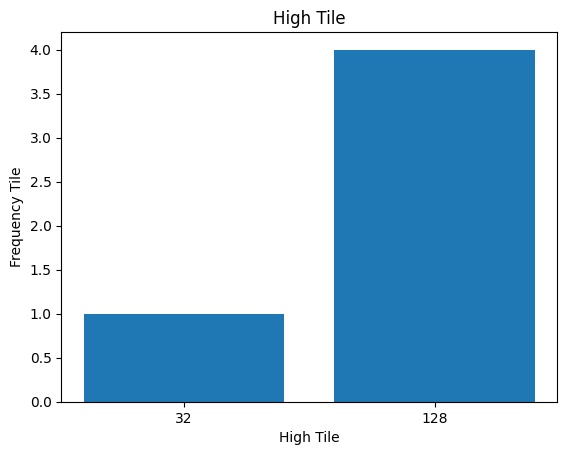

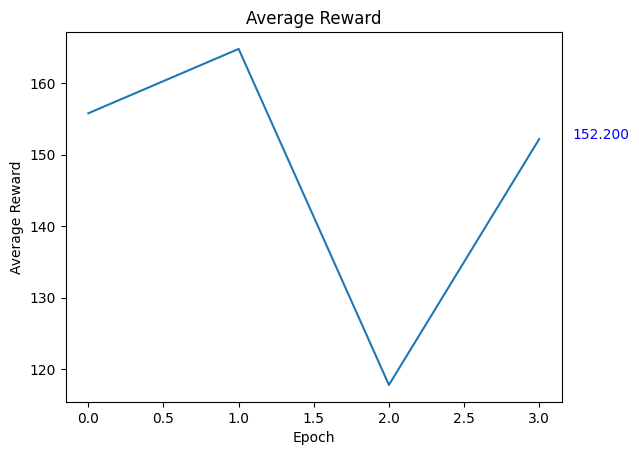

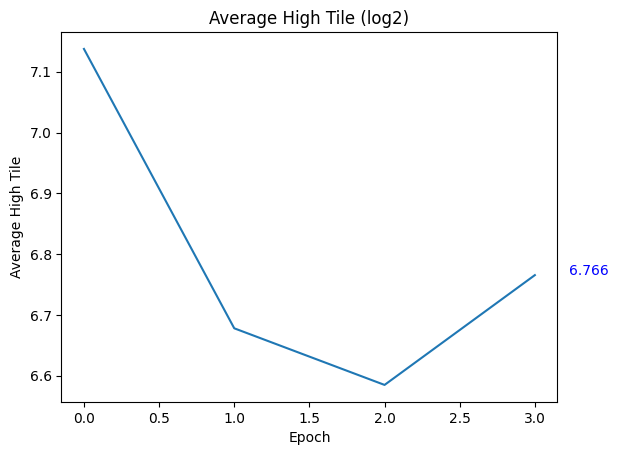

In [3]:
trainer.run_training_loop()